In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df=pd.read_csv('/content/processed_data22.csv')

In [3]:
df.head(5)

,Unnamed: 0,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score
0,0,0,group B,bachelor's degree,standard,0,72,72,74,218
1,1,0,group C,some college,standard,1,69,90,88,247
2,2,0,group B,master's degree,standard,0,90,95,93,278
3,3,1,group A,associate's degree,free/reduced,0,47,57,44,148
4,4,1,group C,some college,standard,0,76,78,75,229


In [4]:
df

,Unnamed: 0,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score
0,0,0,group B,bachelor's degree,standard,0,72,72,74,218
1,1,0,group C,some college,standard,1,69,90,88,247
2,2,0,group B,master's degree,standard,0,90,95,93,278
3,3,1,group A,associate's degree,free/reduced,0,47,57,44,148
4,4,1,group C,some college,standard,0,76,78,75,229
...,...,...,...,...,...,...,...,...,...,...
995,995,0,group E,master's degree,standard,1,88,99,95,282
996,996,1,group C,high school,free/reduced,0,62,55,55,172
997,997,0,group C,high school,free/reduced,1,59,71,65,195
998,998,0,group D,some college,standard,1,68,78,77,223


In [5]:
df.isnull().any()

Unnamed: 0                     False
gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
Total score                    False
dtype: bool

<ipython-input-11-5b87d3843626>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='BrBG',fmt='.2f',linewidths=2,annot=True)


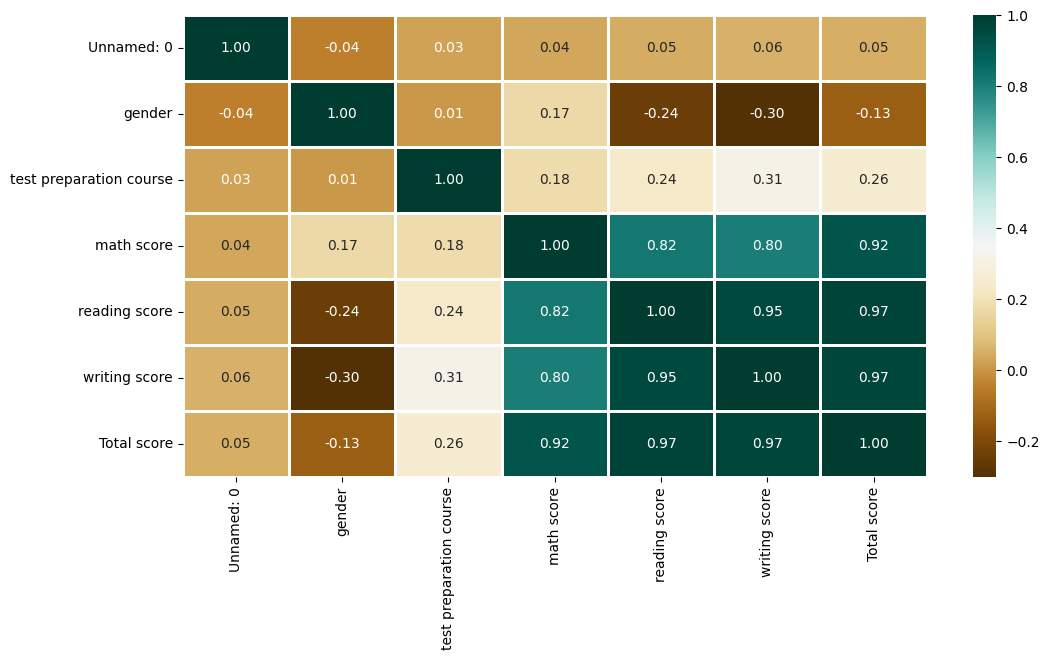

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), cmap='BrBG',fmt='.2f',linewidths=2,annot=True)
plt.savefig('/content/figure1.png')


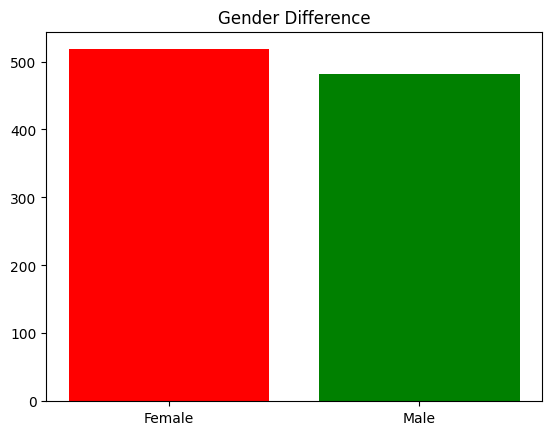

In [12]:
plt.bar(df['gender'].value_counts().index,
       df['gender'].value_counts().values,
       color = ['red', 'green'])
plt.title('Gender Difference')
plt.xticks(df['gender'].value_counts().index,['Female','Male'])
plt.savefig('/content/figure2.png')

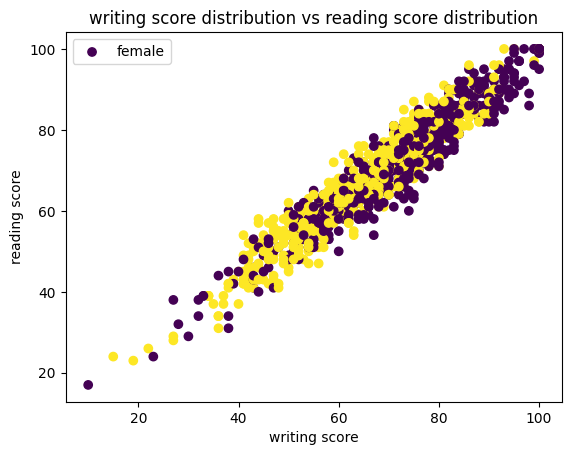

In [15]:
plt.scatter(df['writing score'], df['reading score'], c=df['gender'])
plt.legend(['female'])
plt.xlabel('writing score')
plt.ylabel('reading score')
plt.title('writing score distribution vs reading score distribution')
plt.savefig('/content/figure3.png')

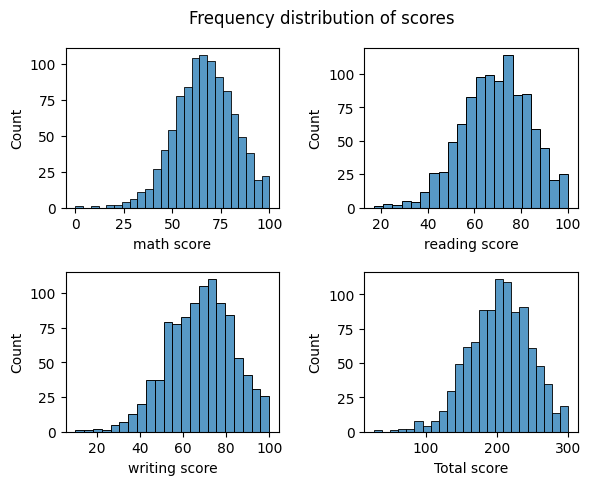

In [16]:
figure, axis = plt.subplots(2,2)

sns.histplot(df['math score'],ax=axis[0,0],label='math score')
sns.histplot(df['reading score'],ax=axis[0,1],label='reading score')
sns.histplot(df['writing score'],ax=axis[1,0],label='writing score')
sns.histplot(df['Total score'],ax=axis[1,1],label='Total score')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.suptitle('Frequency distribution of scores')
plt.savefig('/content/figure4.png')

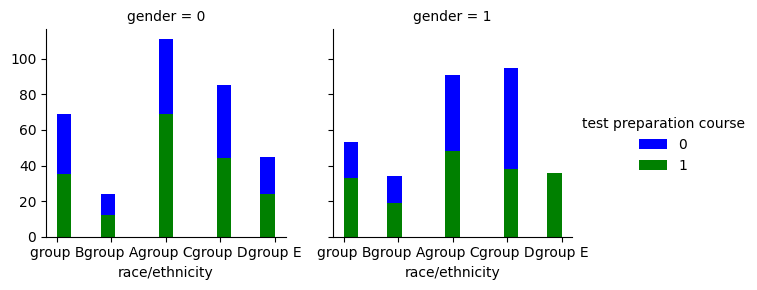

In [21]:
bar = sns.FacetGrid(df, col ='gender',hue_kws={'color': ['b', 'g']}, hue ='test preparation course')
# map the above form facetgrid with some attributes
bar.map(plt.hist, 'race/ethnicity', bins = 15, color ='blue').add_legend()
# show the object
plt.savefig('/content/figure5.png')